In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
d=pd.read_csv("train.csv")
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
d.shape

(891, 12)

In [6]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
d.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 나이 그래프

먼저 나이 그래프를 그리기 전에 나이대별로 구분을 해주겠다.

In [8]:
age=d['Age']//10*10

In [9]:
d['Age10']=d['Age']//10*10
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0


In [10]:
age=d['Age10'].value_counts().sort_index(ascending=True)
age

0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age10, dtype: int64

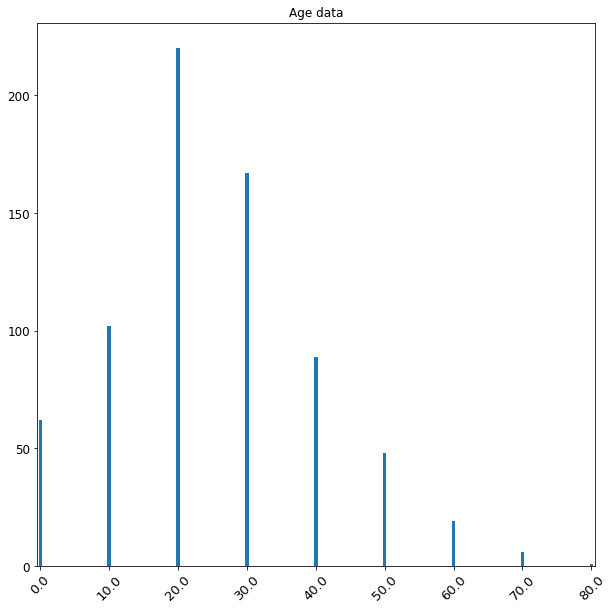

In [11]:
age.plot.bar(figsize=(10,10))
plt.title("Age data")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=12)
plt.show()

## 생존비율

In [12]:
survive=d['Survived'].value_counts()
survive

0    549
1    342
Name: Survived, dtype: int64

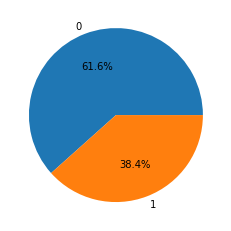

In [13]:
plt.plot(figsize=(20,20))
plt.pie(survive,labels=survive.index,autopct="%.1f%%")
plt.show()

살아남은 것이 1, 살아남지 못한 것이 0이므로 살아남지 못한 사람이 더 많다 

In [14]:
pclass=d['Pclass'].value_counts().sort_index(ascending=True)
pclass

1    216
2    184
3    491
Name: Pclass, dtype: int64

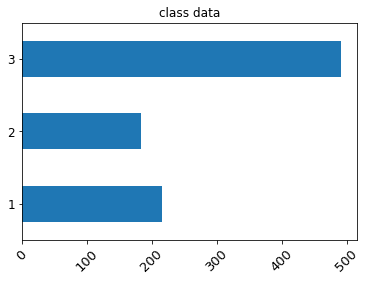

In [15]:
pclass.plot.barh()
plt.title("class data")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=12)
plt.show()

### 생존자와 사망자 나이 평균

In [16]:
survivemean=d[d['Survived']==1]['Age'].mean()
survivemean

28.343689655172415

In [17]:
diemean=d[d['Survived']==0]['Age'].mean()
diemean

30.62617924528302

### 결측값 처리, 나이 소숫점 뒤 삭제

In [18]:
d['Age'].fillna(d['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [19]:
d['Age']=d['Age']/10*10

In [20]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age10
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20.0


### Age와 Age10 정수 처리

In [21]:
#import math
#def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor (age/10)*10

IndentationError: unexpected indent (<ipython-input-21-876906d41dfb>, line 3)

In [ ]:
#d['Age']=d['Age'].apply(age_categorize)

In [ ]:
#d['Age10']=d['Age10'].apply(age_categorize)

In [22]:
#d

## groupby 처리하기

In [23]:
#class로 묶기
class_group = d.groupby('Pclass')
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [24]:
gender_group=d.groupby('Sex')
gender_group.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [25]:
class_group.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age10
Pclass,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,186
2,184,184,184,184,173,184,184,184,184,16,184,173
3,491,491,491,491,355,491,491,491,491,12,491,355


In [26]:
gender_group.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age10
Sex,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,261
male,577,577,577,577,453,577,577,577,577,107,577,453


In [27]:
class_group.mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

확실히 높은 클래스로 갈수록 나이가 많아진다. 

In [28]:
class_group.mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

높은 클래스일수록 생존률이 높다..

In [29]:
gender_group.mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

여자일수록 더 많이 살아남았다

In [30]:
#클래스와 성별에 따른 생존률 구하기
d.groupby(['Pclass','Sex']).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

1등급클래스의 여성들은 거의 살아남았다고 말할 수 있다. 2등급 클래스도 마찬가지이다. 
반면 남성들은 거의 살아남지 못했다. 

In [31]:
d.set_index(['Pclass','Sex']).reset_index()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age10
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,30.0
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,20.0
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,10.0
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,20.0


In [32]:
d.set_index('Age').groupby(level=0).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age10
Age,,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167,0.0
0.67,756.0,1.0,2.0,1.0,1.0,14.5000,0.0
0.75,557.5,1.0,3.0,2.0,1.0,19.2583,0.0
0.83,455.5,1.0,2.0,0.5,1.5,23.8750,0.0
0.92,306.0,1.0,1.0,1.0,2.0,151.5500,0.0
...,...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500,70.0
70.50,117.0,0.0,3.0,0.0,0.0,7.7500,70.0
71.00,295.5,0.0,1.0,0.0,0.0,42.0792,70.0


## 나이대별로 생존률

In [33]:
import math
def age_cateforize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10)*10

In [34]:
d.set_index('Age').groupby(age_cateforize).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Age10
-1,435.581921,0.293785,2.598870,0.564972,0.180791,22.158567,NaN
0,424.741935,0.612903,2.629032,1.854839,1.403226,30.576679,0.0
10,444.362745,0.401961,2.470588,0.666667,0.470588,32.535132,10.0
20,433.231818,0.350000,2.450000,0.322727,0.250000,27.278937,20.0
30,472.449102,0.437126,2.113772,0.353293,0.329341,40.377294,30.0
40,465.606742,0.382022,1.966292,0.370787,0.471910,38.002297,40.0
50,440.187500,0.416667,1.562500,0.291667,0.270833,47.933333,50.0
60,433.736842,0.315789,1.473684,0.263158,0.368421,48.367542,60.0
70,496.500000,0.000000,1.833333,0.166667,0.166667,30.197233,70.0
80,631.000000,1.000000,1.000000,0.000000,0.000000,30.000000,80.0


연령대별로 생존률을 보면 80대가 가장 생존률이 높은데 그 이유는 위에서 분석한 것과 같이 80살이 1명뿐이기 때문이다

In [35]:
d.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean()
d.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare      Age10  
Pclass Sex                            
1      female  106.125798  30.117647  
       male     67.226127  36.633663  
2      female   21.970121  24.189189  
       male     19.741782  26.363636  
3      female   16.118810  17.254902  
       male     12.661633  22.173913

In [36]:
import numpy as np
d.set_index(['Pclass','Sex']).groupby(level=[0,1]).aggregate([np.mean,np.sum,np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp  ...          Parch                  Fare  \
               amax      mean  ... amax      mean  sum amax        mean   
Pclass Sex                     ...                                        
1      female  63.0  0.553191  ...    3  0.457447   43    2  106.125798   
       male    80.0  0.311475  ...    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842  ...    3  0.605263   46    3   21.970121   
       male    70.0  0.342593  ...    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  ...    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  ...    8  0.224784   78    5   12.661633   

                                        Age10                
                     sum      amax       mean     sum  amax  
Pclass Sex                                                   
1      female  9975.8250  512.3292  30.117647  2560.0  60.0  
       male    8201.5875  512.3292  36.633663  3700.0  80.0  
2      female  1669.7292   65.0000  24.189189  1790.0  50.0  
       male    2132.1125   73.5000  26.363636  2610.0  70.0  
3      female  2321.1086   69.5500  17.254902  1760.0  60.0  
       male    4393.5865   69.5500  22.173913  5610.0  70.0  

[6 rows x 21 columns]

<AxesSubplot:>

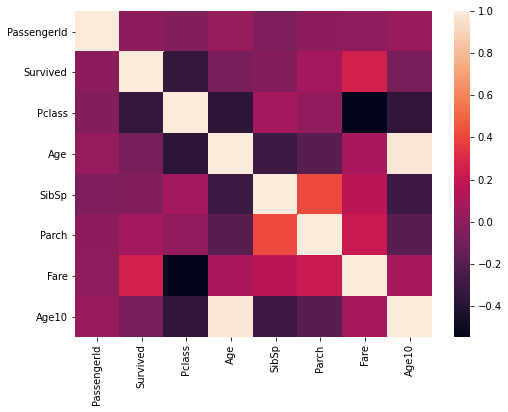

In [37]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(d.corr())

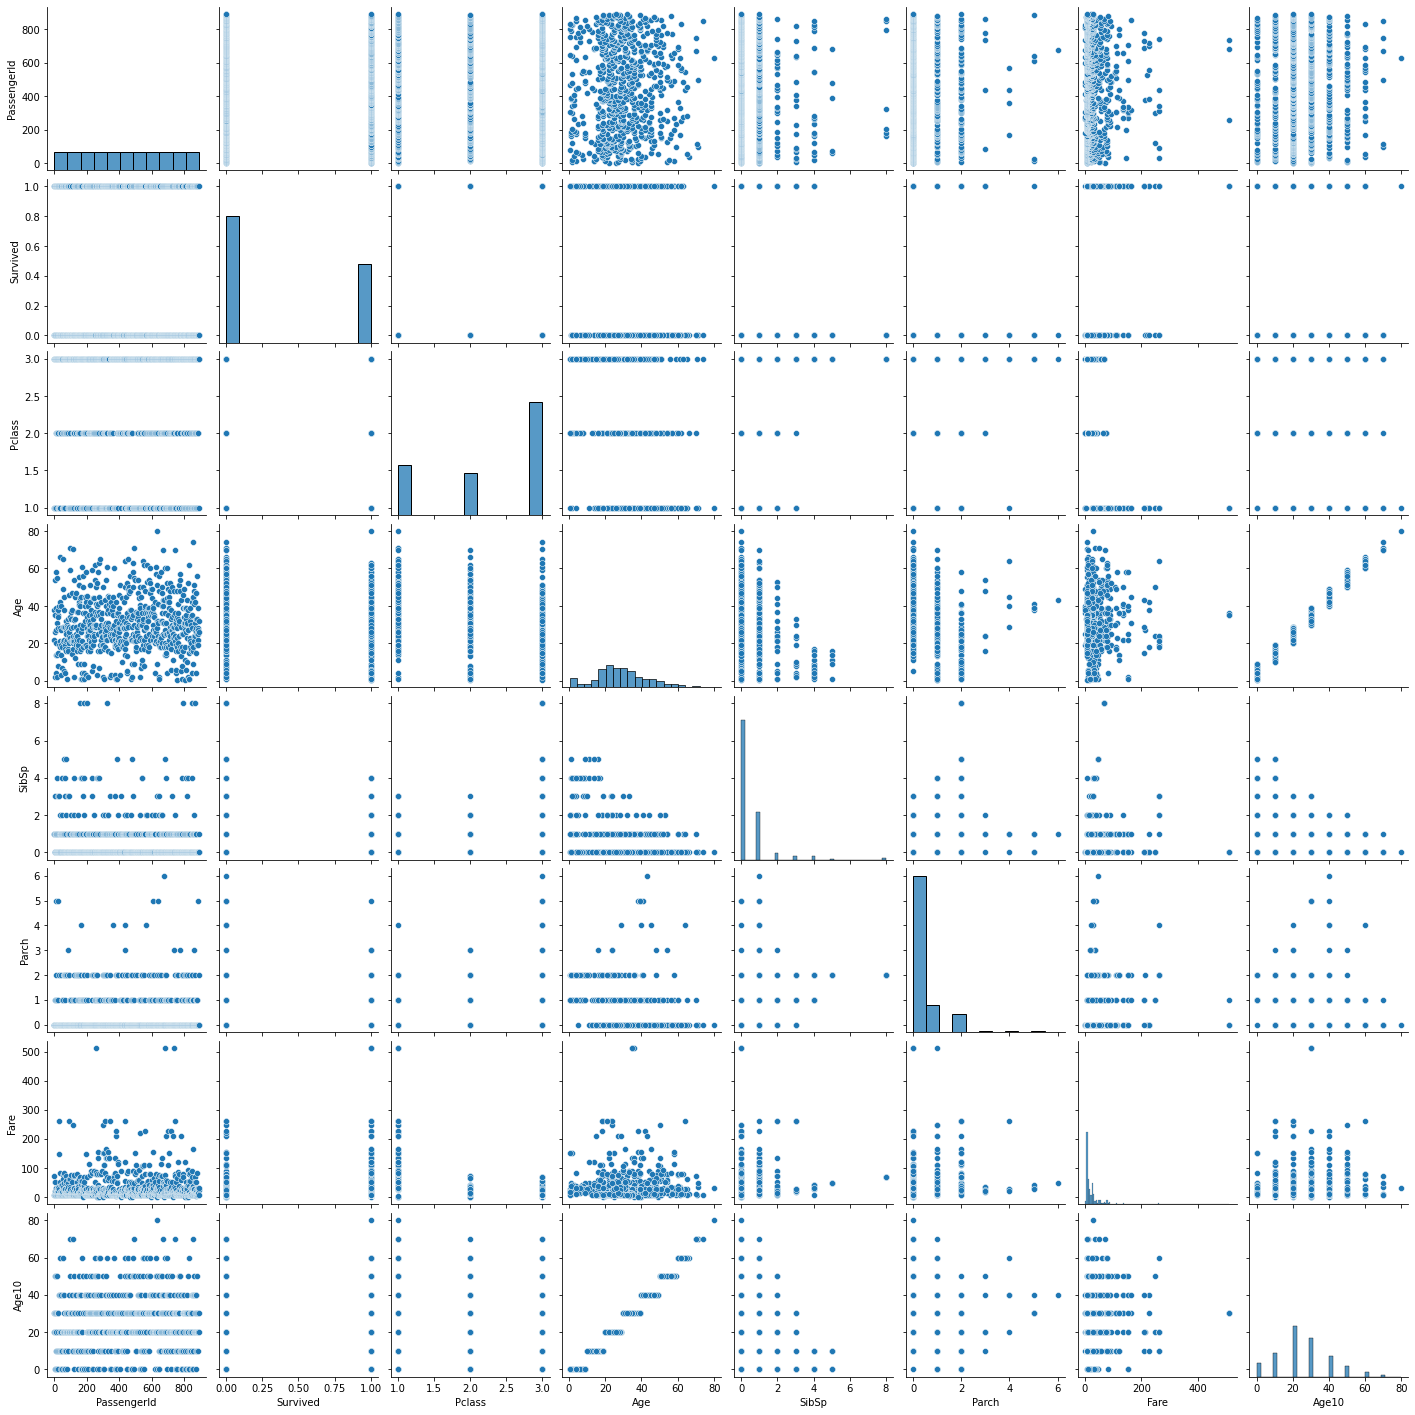

In [38]:
sns.pairplot(d)
plt.show()